In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import seaborn as sns

In [3]:
data = pd.read_csv('adult_data.csv')
data.head(20)

,AGE,WORKCLASS,FNLWTG,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
data.tail()

,AGE,WORKCLASS,FNLWTG,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              32561 non-null  int64 
 1   WORKCLASS        32561 non-null  object
 2   FNLWTG           32561 non-null  int64 
 3   EDUCATION        32561 non-null  object
 4   EDUCATION-NUM    32561 non-null  int64 
 5   MARITAL-STATUS   32561 non-null  object
 6   OCCUPATION       32561 non-null  object
 7   RELATIONSHIP     32561 non-null  object
 8   RACE             32561 non-null  object
 9   SEX              32561 non-null  object
 10  CAPITAL-GAIN     32561 non-null  int64 
 11  CAPITAL-LOSS     32561 non-null  int64 
 12  HOURS-PER-WEEK   32561 non-null  int64 
 13   NATIVE-COUNTRY  32561 non-null  object
 14  INCOME           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
count = [[],[],[],[]]
for col in data.columns:
    length = len(data[col].unique())
    if length == 1:
        count[0].append(col) #single value
    elif length ==2:
        count[1].append(col) #binary value
    elif (length > 2 and length < 16):
        count[2].append(col)
    else:
        count[3].append(col)

In [42]:
print('Unique value: ',count[0])
print('Binary value: ',count[1])
print('Categorical value: ',count[2])
print('Continous value: ',count[3])

Unique value:  []
Binary value:  ['SEX', 'INCOME']
Categorical value:  ['WORKCLASS', 'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE']
Continous value:  ['AGE', 'FNLWTG', 'EDUCATION', 'EDUCATION-NUM', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK', ' NATIVE-COUNTRY']


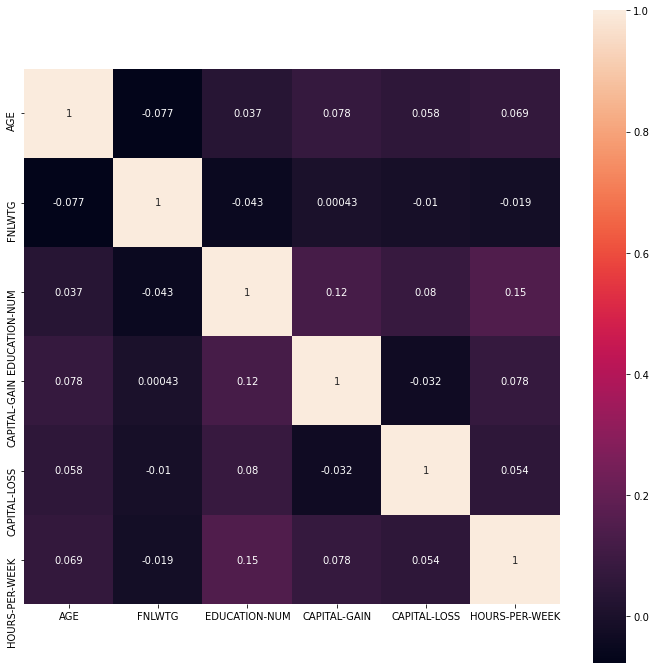

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,square=True)

* education num, capital gain and education num and hours per week are some what correlated

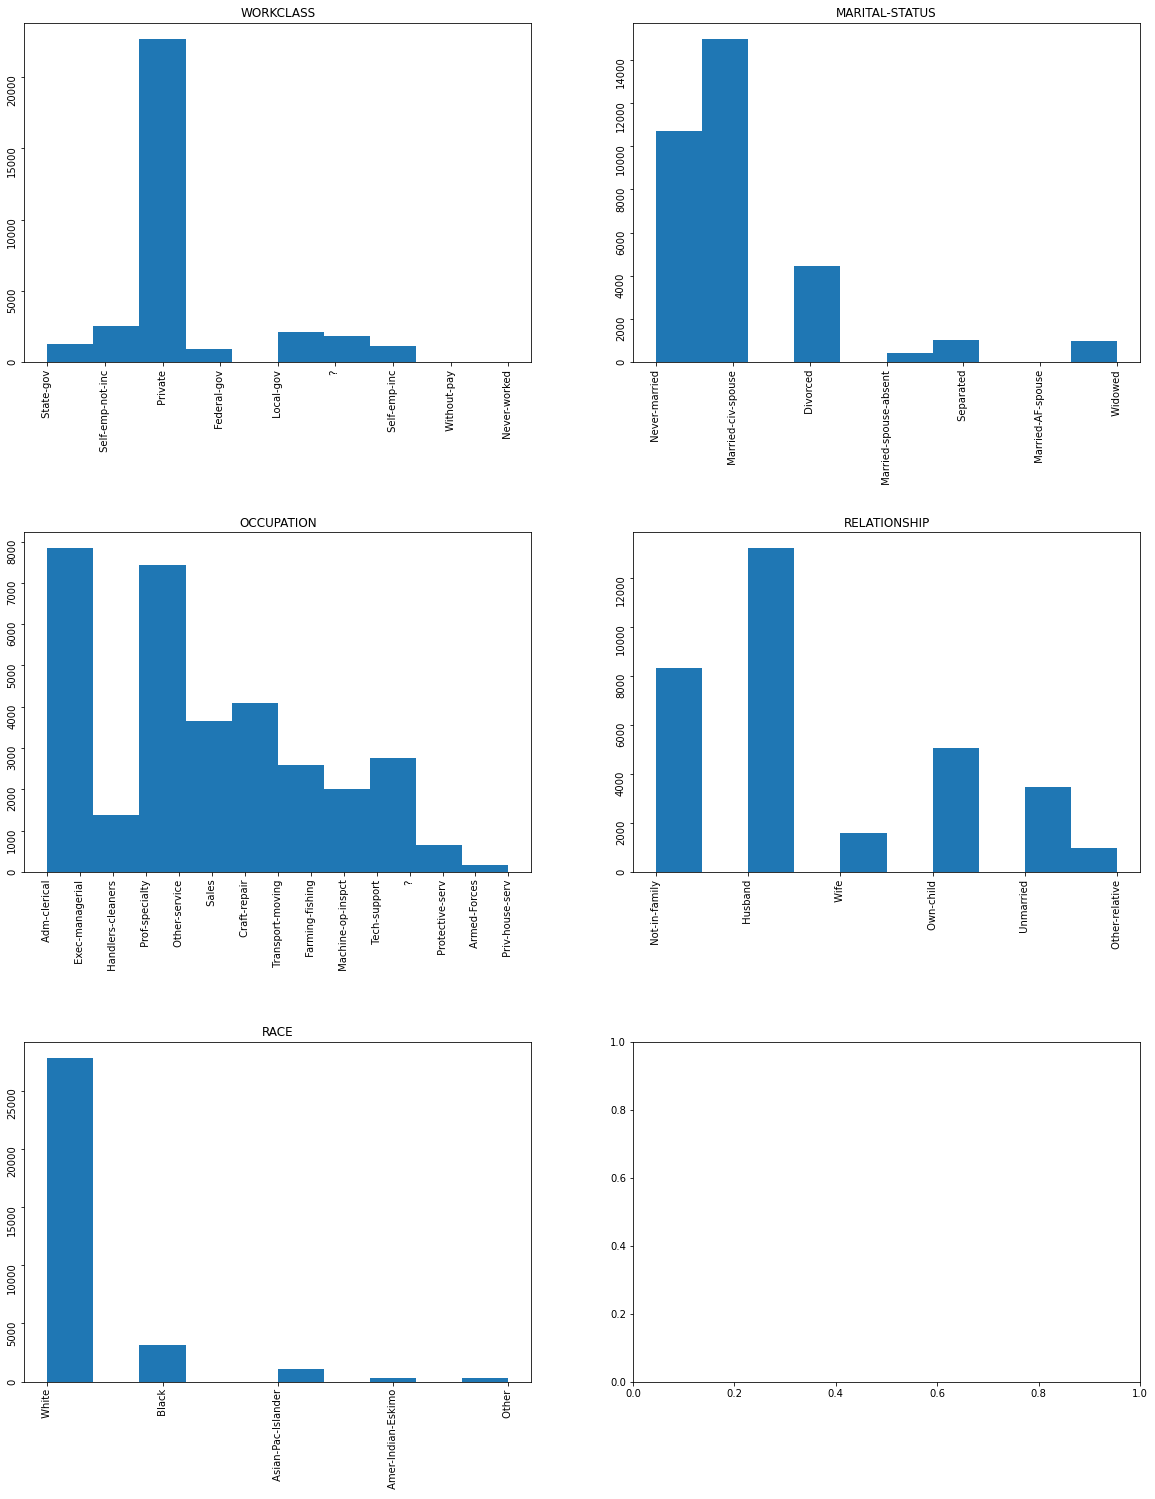

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(20,25))
fig.subplots_adjust(hspace=0.5)
axs=axs.ravel()
i=0
for col in count[2]:
    axs[i].hist(data[col])
    axs[i].tick_params(labelrotation=90)
    axs[i].set_title(col)
    i+=1
plt.show()

In [63]:
# numbers of columns
len(data.columns)

15

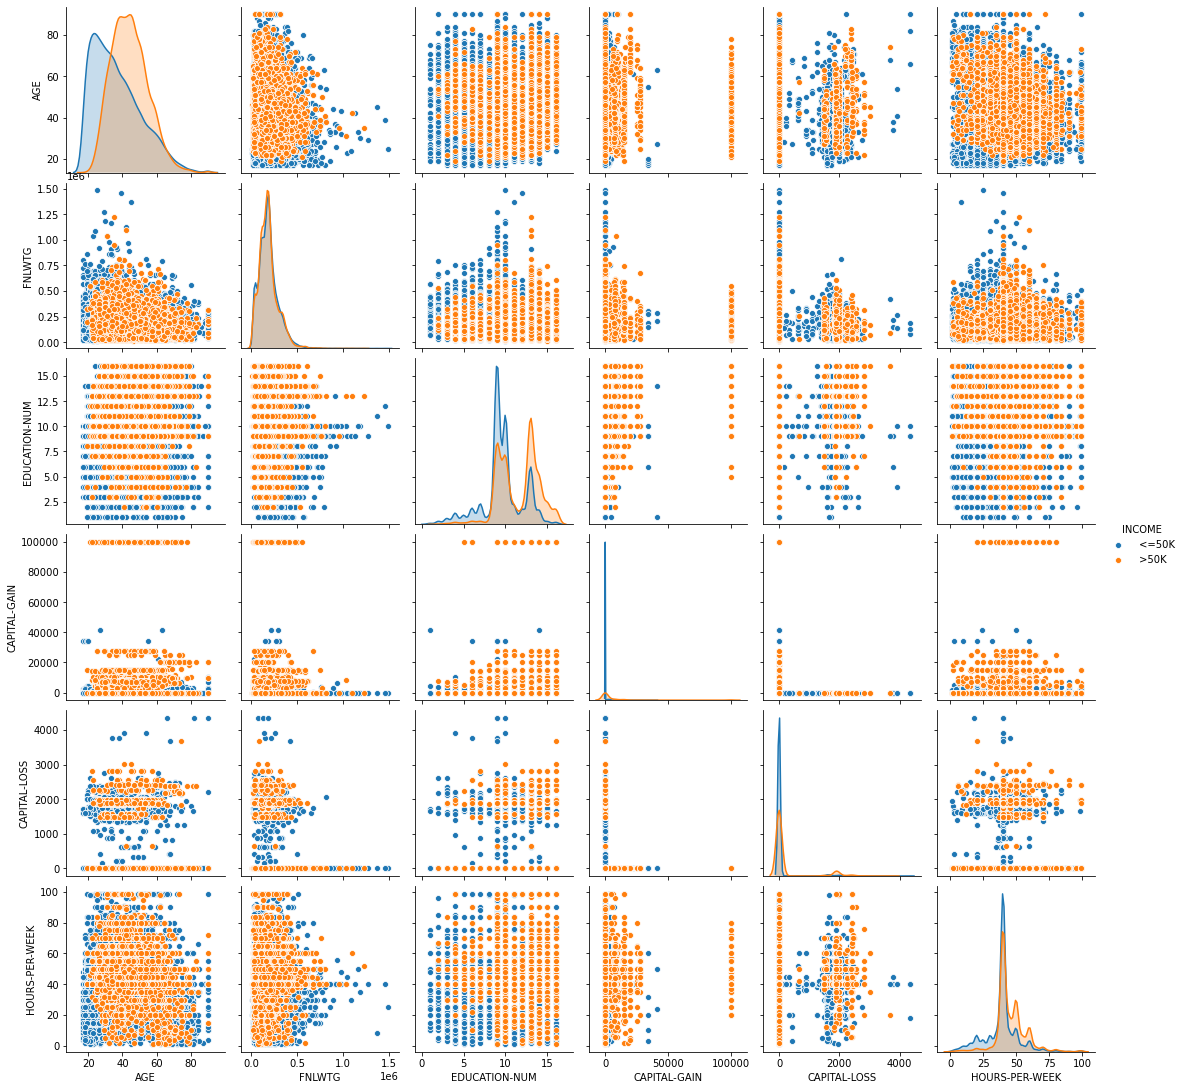

In [65]:
sns.pairplot(data,hue='INCOME')

In [72]:
#crosstab
for col in count[2]:
    print(pd.crosstab(data[col],data.INCOME))
    print()

INCOME              <=50K   >50K
WORKCLASS                       
 ?                   1645    191
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            17733   4963
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            945    353
 Without-pay           14      0

INCOME                   <=50K   >50K
MARITAL-STATUS                       
 Divorced                 3980    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8284   6692
 Married-spouse-absent     384     34
 Never-married           10192    491
 Separated                 959     66
 Widowed                   908     85

INCOME               <=50K   >50K
OCCUPATION                       
 ?                    1652    191
 Adm-clerical         3263    507
 Armed-Forces            8      1
 Craft-repair         3170    929
 Exec-managerial      2098   1968
 Farming-fishing       879    115
 Handlers-cleaners   